# Question 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_9234/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [4]:
# celsius conversion
ds_cels = ds
ds_cels['sst_celsius'] = ds.analysed_sst - 273.15
ds_cels.coords['day_of_year'] = ds_cels.time.dt.dayofyear

# filter by year, Newport location
ds14 = ds_cels.sel(time='2014').sel(lat=45, lon=-124.061, method='nearest')
ds15 = ds_cels.sel(time='2015').sel(lat=45, lon=-124.061, method='nearest')
ds16 = ds_cels.sel(time='2016').sel(lat=45, lon=-124.061, method='nearest')

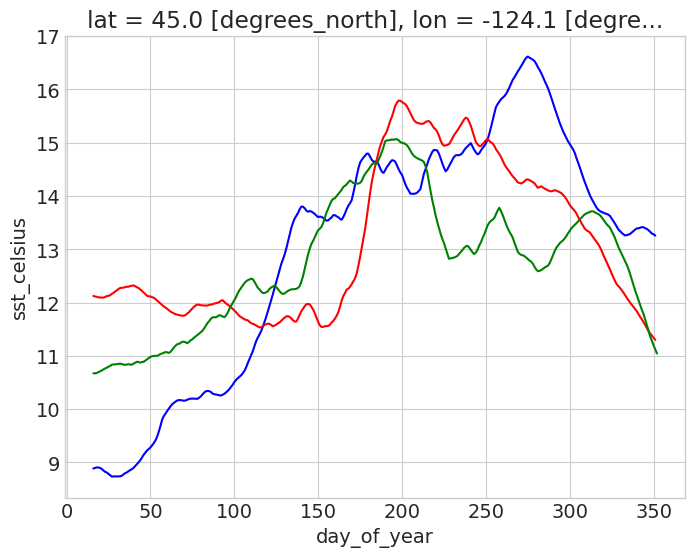

In [14]:
ds14.sst_celsius.rolling(time=30, center=True).mean().plot(x='day_of_year', color='blue')
ds15.sst_celsius.rolling(time=30, center=True).mean().plot(x='day_of_year', color='red')
ds16.sst_celsius.rolling(time=30, center=True).mean().plot(x='day_of_year', color='green')
#rollings_grouped.plot(x='day_of_year', color='black')

In [16]:
rollings = ds_cels.sel(lat=45, lon=-124.061, method='nearest').sst_celsius.rolling(time=30, center=True).mean()
rollings_grouped = rollings.groupby('day_of_year').mean()

rollings_sds = rollings.groupby('day_of_year').std()

In [17]:
rollings_sds

<xarray.DataArray 'sst_celsius' (day_of_year: 366)>
array([0.895046  , 0.8877562 , 0.882154  , 0.8774832 , 0.87111264,
       0.8659008 , 0.88376224, 0.87680537, 0.875255  , 0.88032585,
       0.8863843 , 0.8936219 , 0.90139204, 0.90586376, 0.9093785 ,
       0.91102964, 0.90958154, 0.9090992 , 0.912301  , 0.91567343,
       0.9216879 , 0.92963296, 0.93941927, 0.9470617 , 0.95214015,
       0.9598882 , 0.9679657 , 0.9724888 , 0.9762176 , 0.9817213 ,
       0.9888833 , 0.99709636, 0.99959075, 0.999327  , 1.000783  ,
       1.0040427 , 1.0071064 , 1.0096111 , 1.0094643 , 1.006727  ,
       1.0011574 , 0.9952501 , 0.9910334 , 0.9869896 , 0.98323864,
       0.97764516, 0.97394276, 0.97157806, 0.97002673, 0.9701093 ,
       0.9678639 , 0.9660969 , 0.9658579 , 0.96513987, 0.96428174,
       0.964662  , 0.967079  , 0.96899843, 0.9720981 , 0.9725665 ,
       0.97226226, 0.9739029 , 0.9782031 , 0.9826546 , 0.9842365 ,
       0.9894776 , 0.9906509 , 0.9947076 , 0.9984659 , 0.9975231 ,
       0.9950993 , 0.9941919 , 0.9928341 , 0.99249715, 0.9919502 ,
       0.9927709 , 0.99081665, 0.9914778 , 0.99115986, 0.98961204,
       0.98802894, 0.9833771 , 0.97940725, 0.97678214, 0.97611356,
       0.97308   , 0.96542495, 0.95833856, 0.9485585 , 0.9422568 ,
       0.9363597 , 0.9286059 , 0.9181298 , 0.9012943 , 0.88701665,
       0.8752325 , 0.8677139 , 0.86047107, 0.8543747 , 0.8505831 ,
...
       1.3564235 , 1.3658115 , 1.3738676 , 1.3834267 , 1.3912587 ,
       1.3926072 , 1.393121  , 1.3910989 , 1.3872074 , 1.3717086 ,
       1.3536038 , 1.3374712 , 1.3195685 , 1.30052   , 1.2819448 ,
       1.2664517 , 1.2546566 , 1.241256  , 1.2270509 , 1.2135276 ,
       1.2057874 , 1.1962928 , 1.183596  , 1.1712999 , 1.1573403 ,
       1.1421176 , 1.131158  , 1.1142286 , 1.0942085 , 1.079927  ,
       1.0663021 , 1.0535691 , 1.0399252 , 1.0193963 , 0.99543697,
       0.9688053 , 0.9449063 , 0.9232094 , 0.906428  , 0.89611953,
       0.8863179 , 0.87827265, 0.86843324, 0.8593461 , 0.8537113 ,
       0.8513555 , 0.8516444 , 0.8483677 , 0.84725744, 0.8493616 ,
       0.85541093, 0.86385846, 0.8737933 , 0.881594  , 0.8841487 ,
       0.8856534 , 0.8861132 , 0.8869144 , 0.8912808 , 0.90009433,
       0.90664774, 0.90999365, 0.9112148 , 0.91613   , 0.92037094,
       0.92377216, 0.9291913 , 0.9369438 , 0.9455138 , 0.9546985 ,
       0.9606046 , 0.96948344, 0.9780143 , 0.98076695, 0.9756279 ,
       0.97005683, 0.9626149 , 0.9562121 , 0.94971603, 0.94692177,
       0.9451817 , 0.9407399 , 0.9357019 , 0.9310827 , 0.9286843 ,
       0.92538685, 0.92049927, 0.9149546 , 0.91011864, 0.90685534,
       0.90551543, 0.9030467 , 0.9027124 , 0.90260017, 0.90073574,
       0.51033866], dtype=float32)
Coordinates:
    lat          float32 45.0
    lon          float32 -124.1
  * day_of_year  (day_of_year) int64 1 2 3 4 5 6 7 ... 361 362 363 364 365 366